In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import linmix
from linmix.linmix import LinMix
import math

In [2]:
filepath = r"C:\Users\Iris Reitsma\Documents\Master\jaar 3\scriptie\optX\NSXBs-jhk.dat"

# read flash.dat to a list of lists
datContent = [i.strip().split() for i in open(filepath).readlines()]
data = pd.DataFrame(data=datContent[1:], columns=datContent[0])

# Drop nan rows
data = data.mask(data.eq('None')).dropna()

# Convert numbers to ints
data['log(Lx)'] = pd.to_numeric(data['log(Lx)'])
data['log(L_nu_OIR)'] = pd.to_numeric(data['log(L_nu_OIR)'])
display(data)

,"#Source,",log(Lx),log(L_nu_OIR),Filter
0,J1900,36.265431,18.718271,J
1,aqlx1,36.078077,19.383006,J
2,4U061,35.995698,18.192096,J
3,aqlx1,36.657518,19.583016,J
4,aqlx1,36.203739,19.663020,J
5,aqlx1,36.368468,19.823028,J
6,aqlx1,36.632191,19.983036,J
7,aqlx1,36.683142,19.903032,J
8,aqlx1,36.255825,19.623018,J
10,scox1,38.455331,20.372441,H


In [3]:
filepath_bh = r"C:\Users\Iris Reitsma\Documents\Master\jaar 3\scriptie\optX\BHXBs-hard-jhk.dat"

# read flash.dat to a list of lists
datContent_bh = [i.strip().split() for i in open(filepath_bh).readlines()]
data_bh = pd.DataFrame(data=datContent_bh[1:], columns=datContent_bh[0])

# Drop nan rows
data_bh = data_bh.mask(data_bh.eq('None')).dropna()

# Convert numbers to ints
data_bh['log(Lx)'] = pd.to_numeric(data_bh['#log(Lx)'])
data_bh['log(L_nu_OIR)'] = pd.to_numeric(data_bh['log(L_nu_OIR)'])
display(data_bh)

,#log(Lx),log(L_nu_OIR),Source,log(Lx)
0,35.431960,19.838653,XTE1118,35.431960
1,35.449931,19.778650,XTE1118,35.449931
2,35.471375,19.966659,XTE1118,35.471375
3,35.174038,19.538684,XTE1118,35.174038
4,35.431960,19.883565,XTE1118,35.431960
...,...,...,...,...
71,37.794537,21.763187,GX339-4,37.794537
72,36.484711,20.909701,GX339-4,36.484711
73,36.913656,21.189714,GX339-4,36.913656
74,36.484711,20.825672,GX339-4,36.484711


In [4]:
tbl = pd.read_csv('preprocessed_data_avg.csv')
valid = ~(np.isnan(tbl['L_X']) | np.isnan(tbl['L_NIR']))
tbl = tbl[valid]
display(tbl.head())

states = pd.read_csv('FSRED Mags - total_source_list.csv')
nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ') | (states['NS/BH']=='NS (UC)')]['Source'].to_list()
tbl = tbl[tbl['Source'].isin(nss)]



,Unnamed: 0,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,...,log_L_NIR_errup_nodist,log_L_NIR_errlow_nodist,log_L_NIR_errup_noflux,log_L_NIR_errlow_noflux,log_L_X_errup_nodist,log_L_X_errlow_nodist,log_L_X_errup_noflux,log_L_X_errlow_noflux,log_L_NIR_upplim,log_L_X_upplim
0,0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003808,0.003808,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
1,2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.002848,0.002848,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
2,4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,0.003019,0.003019,NaN,NaN,0.108574,0.108574,NaN,NaN,NaN,NaN
3,6,UW_Crb,Ks,1081,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.051416,0.051416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,UW_Crb,H,1086,S,2018-06-19,16 05 45.8746697208,25 51 45.246497976,0.10,"Gaia Collaboration 2020, Gaia",...,0.038230,0.038230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:


nir_Ks, nir_H, nir_J = [], [], []
x_Ks, x_H, x_J = [], [], []
tot_nir_NS= []
tot_X_NS = []
for index, row in tbl.iterrows():
    band = row['Filter']
    L_ergs = row['L_NIR']
    c = 2.9979e18 # A/s

    if band == 'Ks':
        W_eff = 3163.40 # A
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_Ks.append(np.log10(L_ergsHz))
        x_Ks.append(row['log_L_X'])
        
    if band == 'H':
        W_eff = 2769.45 # A 
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_H.append(np.log10(L_ergsHz))
        x_H.append(row['log_L_X'])    
        
    if band == 'J':
        W_eff = 2214.62 # A
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_J.append(np.log10(L_ergsHz))
        x_J.append(row['log_L_X'])

    tot_nir_NS.append(np.log10(L_ergsHz))
    tot_X_NS.append(row['log_L_X'])      

In [6]:
tbl2 = pd.read_csv('preprocessed_data_avg.csv')
valid = ~(np.isnan(tbl2['L_X']) | np.isnan(tbl2['L_NIR']))
tbl2 = tbl2[valid]

states = pd.read_csv('FSRED Mags - total_source_list.csv')
bhs = states[(states['NS/BH']=='BH') | (states['NS/BH']=='BH ')]['Source'].to_list()
tbl_BH = tbl2[tbl2['Source'].isin(bhs)]

nir_Ks_BH, nir_H_BH, nir_J_BH = [], [], []
x_Ks_BH, x_H_BH, x_J_BH = [], [], []
tot_nir_BH = []
tot_X_BH = []
for index, row in tbl_BH.iterrows():
    band = row['Filter']
    L_ergs = row['L_NIR']
    c = 2.9979e18 # A/s

    if band == 'Ks':
        W_eff = 3163.40 # A
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_Ks_BH.append(np.log10(L_ergsHz))
        x_Ks_BH.append(row['log_L_X'])
        
    if band == 'H':
        W_eff = 2769.45 # A 
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_H_BH.append(np.log10(L_ergsHz))
        x_H_BH.append(row['log_L_X'])    
        
    if band == 'J':
        W_eff = 2214.62 # A
        Hz = c/W_eff
        L_ergsHz = L_ergs / Hz
        
        nir_J_BH.append(np.log10(L_ergsHz))
        x_J_BH.append(row['log_L_X'])

    tot_nir_BH.append(np.log10(L_ergsHz))
    tot_X_BH.append(row['log_L_X'])        
        

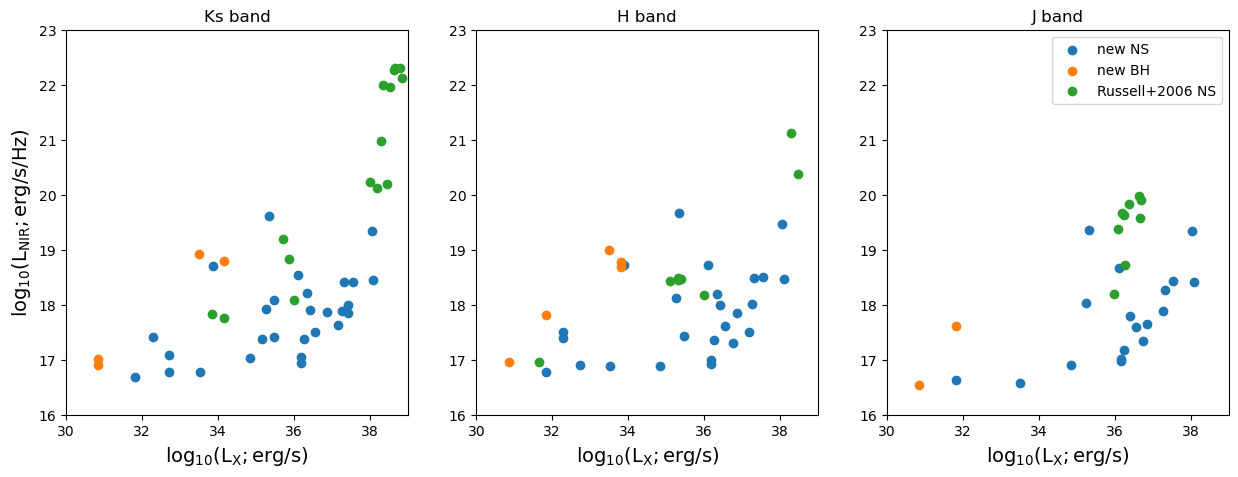

In [7]:
fig, ax = plt.subplots(1,3,figsize = (15, 5))

ax[0].scatter(x_Ks, nir_Ks)
ax[0].scatter(x_Ks_BH, nir_Ks_BH)
ax[0].scatter(data[data['Filter'] == 'K']['log(Lx)'], data[data['Filter'] == 'K']['log(L_nu_OIR)'])
# ax[0].scatter(data_bh[data_bh['Filter'] == 'K']['log(Lx)'], data_bh[data_bh['Filter'] == 'K']['log(L_nu_OIR)'])
ax[0].set_xlim(30, 39)
ax[0].set_ylim(16, 23)
ax[0].set_title('Ks band')
ax[0].set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s/Hz)}$', fontsize=14)
ax[0].set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)

ax[1].scatter(x_H, nir_H)
ax[1].scatter(x_H_BH, nir_H_BH)
ax[1].scatter(data[data['Filter'] == 'H']['log(Lx)'], data[data['Filter'] == 'H']['log(L_nu_OIR)'])
# ax[1].scatter(data_bh[data_bh['Filter'] == 'H']['log(Lx)'], data_bh[data_bh['Filter'] == 'H']['log(L_nu_OIR)'])
ax[1].set_xlim(30, 39)
ax[1].set_ylim(16, 23)
ax[1].set_title('H band')
ax[1].set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)


ax[2].scatter(x_J, nir_J, label='new NS')
ax[2].scatter(x_J_BH, nir_J_BH, label='new BH')
ax[2].scatter(data[data['Filter'] == 'J']['log(Lx)'], data[data['Filter'] == 'J']['log(L_nu_OIR)'], label='Russell+2006 NS')
# ax[2].scatter(data_bh[data_bh['Filter'] == 'J']['log(Lx)'], data_bh[data_bh['Filter'] == 'J']['log(L_nu_OIR)'], label='Russell+2006 hard BH')
ax[2].set_xlim(30, 39)
ax[2].set_ylim(16, 23)
ax[2].set_title('J band')
ax[2].legend()
ax[2].set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)

plt.show()

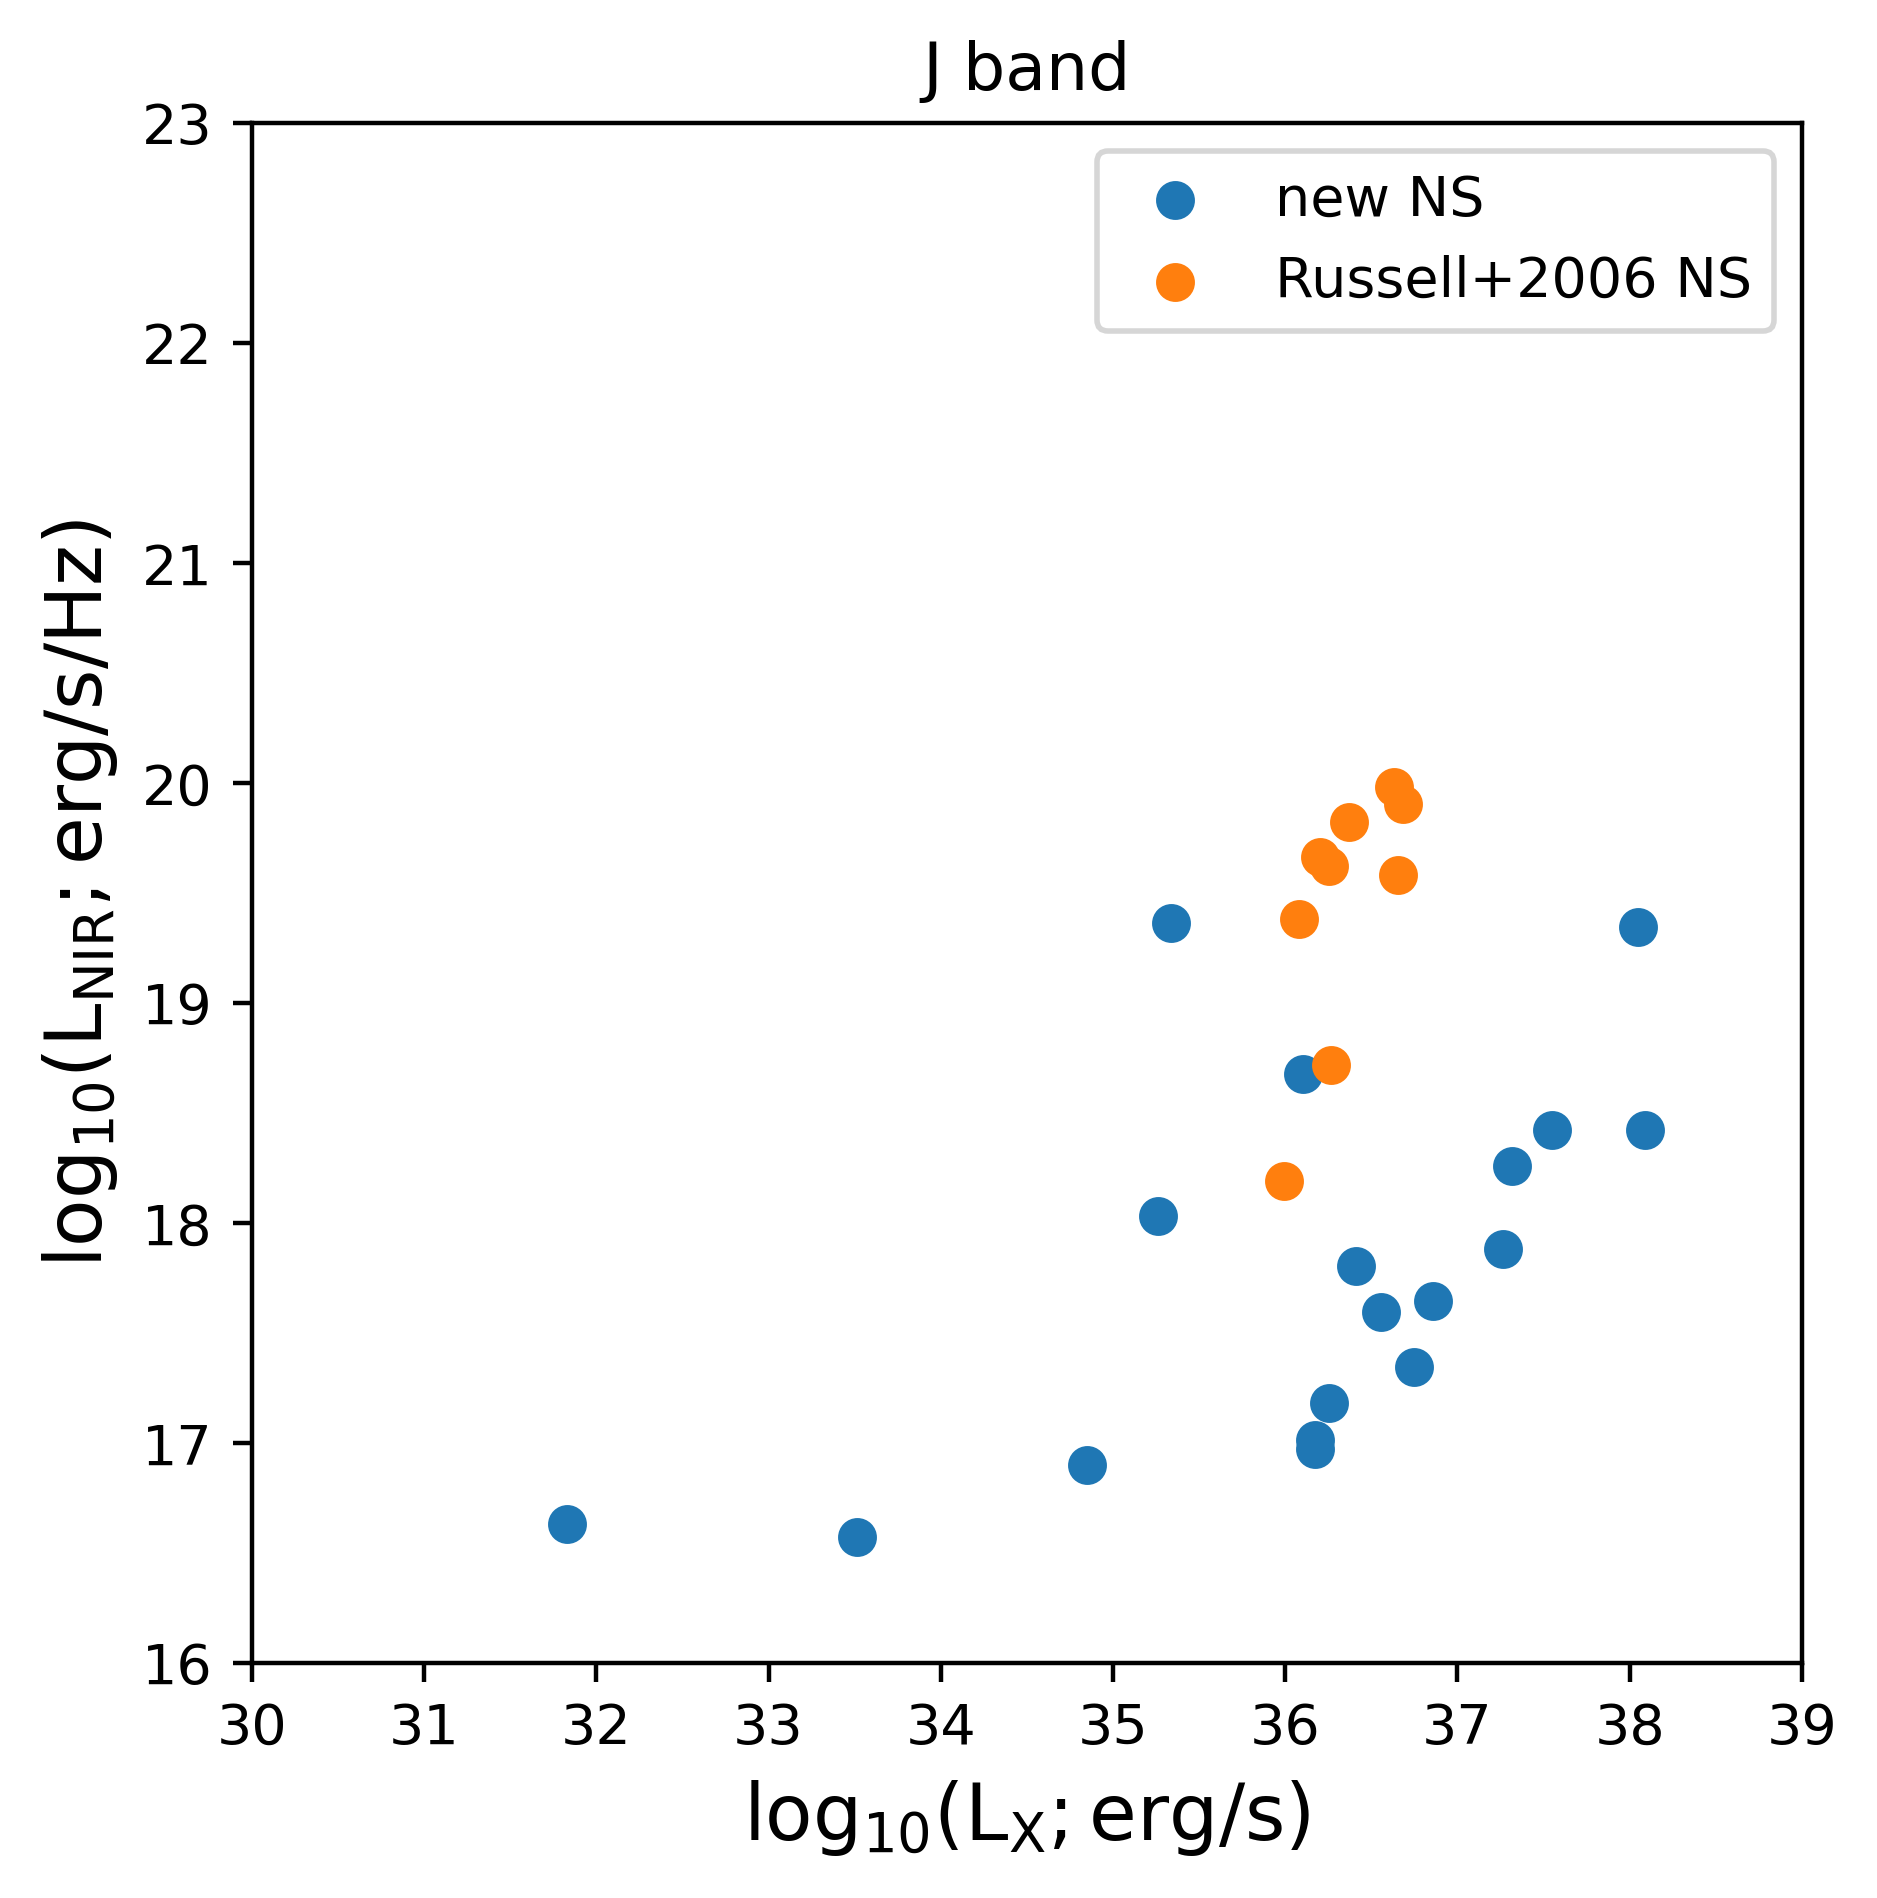

In [14]:
fig, ax = plt.subplots(figsize = (5, 5), dpi=400)

# ax.scatter(x_Ks, nir_Ks, label='new NS')
# ax.scatter(x_Ks_BH, nir_Ks_BH)
# ax.scatter(data[data['Filter'] == 'K']['log(Lx)'], data[data['Filter'] == 'K']['log(L_nu_OIR)'], label='Russell+2006 NS')
# ax[0].scatter(data_bh[data_bh['Filter'] == 'K']['log(Lx)'], data_bh[data_bh['Filter'] == 'K']['log(L_nu_OIR)'])
ax.set_xlim(30, 39)
ax.set_ylim(16, 23)
ax.set_title('J band')
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s/Hz)}$', fontsize=14)
ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)

# ax.scatter(x_H, nir_H, label='new NS')
# ax.scatter(x_H_BH, nir_H_BH)
# ax.scatter(data[data['Filter'] == 'H']['log(Lx)'], data[data['Filter'] == 'H']['log(L_nu_OIR)'], label='Russell+2006 NS')


ax.scatter(x_J, nir_J, label='new NS')
# ax.scatter(x_J_BH, nir_J_BH, label='new BH')
ax.scatter(data[data['Filter'] == 'J']['log(Lx)'], data[data['Filter'] == 'J']['log(L_nu_OIR)'], label='Russell+2006 NS')

ax.legend()
plt.show()

In [ ]:
plt.scatter(data['log(Lx)'], data['log(L_nu_OIR)'])

In [ ]:
last_source = None
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey', 'C0', 'C1']
i=0
for index, row in data_bh.iterrows():
    s = row['Source']
#     print(s)
    # every source gets a new shape-color combination
    if s != last_source: 
        i +=1
    c = colors[i]
    plt.scatter(row['log(Lx)'], row['log(L_nu_OIR)'], c=c, label=s)
    last_source = s
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (10, 10))
plt.scatter(data_bh['log(Lx)'], data_bh['log(L_nu_OIR)'], label='Russell+2006 BH (hard)')
plt.scatter(data['log(Lx)'], data['log(L_nu_OIR)'], label='Russell+2006 NS')
plt.scatter(tot_X_BH, tot_nir_BH, label='new BH (quiescence)')
plt.scatter(tot_X_NS, tot_nir_NS, label='new NS')
plt.legend()
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s/Hz)}$', fontsize=14)
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.show()

In [ ]:
lm_bh_russell = LinMix(data_bh['log(Lx)'], data_bh['log(L_nu_OIR)'], K=2, seed=2)
lm_bh_russell.run_mcmc(silent=False)
lm_ns_russell = LinMix(data['log(Lx)'], data['log(L_nu_OIR)'], K=2, seed=2)
lm_ns_russell.run_mcmc(silent=False)
lm_bh = LinMix(tot_X_BH, tot_nir_BH, K=2, seed=2)
lm_bh.run_mcmc(silent=False)
lm_ns = LinMix(tot_X_NS, tot_nir_NS, K=2, seed=2)
lm_ns.run_mcmc(silent=False)

In [ ]:
# fig, ax = plt.subplots(1,1,figsize = (10, 10))
# plt.scatter(data_bh['log(Lx)'], data_bh['log(L_nu_OIR)'], label='Russell+2006 BH (hard)')
# plt.scatter(data['log(Lx)'], data['log(L_nu_OIR)'], label='Russell+2006 NS')
# plt.scatter(tot_X_BH, tot_nir_BH, label='new BH (quiescence)')
# plt.scatter(tot_X_NS, tot_nir_NS, label='new NS')
# plt.legend()
# plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s/Hz)}$', fontsize=14)
# plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
# plt.show()

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
# ax.scatter(x_ns, y_ns, alpha=0.5)
# ax.errorbar(x_ns, y_ns, xerr=xsig_ns, yerr=ysig_ns, ls=' ', alpha=0.5)
# ax.scatter(x_bh, y_bh, alpha=0.5, color='C1')
# ax.errorbar(x_bh, y_bh, xerr=xsig_bh, yerr=ysig_bh, ls=' ', alpha=0.5, color='C1')
ax.scatter(data_bh['log(Lx)'], data_bh['log(L_nu_OIR)'], label='Russell+2006 BH (hard)')
ax.scatter(data['log(Lx)'], data['log(L_nu_OIR)'], label='Russell+2006 NS')
ax.scatter(tot_X_BH, tot_nir_BH, label='new BH (quiescence)')
ax.scatter(tot_X_NS, tot_nir_NS, label='new NS')
for i in range(0, len(lm_bh_russell.chain), 25):
    xs = np.arange(30,41)
    ys = lm_bh_russell.chain[i]['alpha'] + xs * lm_bh_russell.chain[i]['beta']
    ax.plot(xs, ys, color='C0', alpha=0.02)
for i in range(0, len(lm_ns_russell.chain), 25):
    xs = np.arange(30,41)
    ys = lm_ns_russell.chain[i]['alpha'] + xs * lm_ns_russell.chain[i]['beta']
    ax.plot(xs, ys, color='C1', alpha=0.02)
for i in range(0, len(lm_bh.chain), 25):
    xs = np.arange(30,41)
    ys = lm_bh.chain[i]['alpha'] + xs * lm_bh.chain[i]['beta']
    ax.plot(xs, ys, color='C2', alpha=0.02)
for i in range(0, len(lm_ns.chain), 25):
    xs = np.arange(30,41)
    ys = lm_ns.chain[i]['alpha'] + xs * lm_ns.chain[i]['beta']
    ax.plot(xs, ys, color='C3', alpha=0.02)
    
# ys = alpha + xs * beta
# ax.plot(xs, ys, color='k')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(30,40)
# ax.set_ylim(30,38)
# ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
plt.legend()
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s/Hz)}$', fontsize=14)
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
fig.tight_layout()

In [ ]:
print(np.mean(lm_bh_russell.chain['beta']), np.std(lm_bh_russell.chain['beta']))
print(np.mean(lm_ns_russell.chain['beta']), np.std(lm_ns_russell.chain['beta']))
print(np.mean(lm_bh.chain['beta']), np.std(lm_bh.chain['beta']))
print(np.mean(lm_ns.chain['beta']), np.std(lm_ns.chain['beta']))

In [ ]:
plt.scatter(lm_bh_russell.chain['beta'], lm_bh_russell.chain['alpha'], s=0.1, color='C0')
plt.scatter(lm_ns_russell.chain['beta'], lm_ns_russell.chain['alpha'], s=0.1, color='C1')
plt.scatter(lm_bh.chain['beta'], lm_bh.chain['alpha'], s=0.1, color='C2')
plt.scatter(lm_ns.chain['beta'], lm_ns.chain['alpha'], s=0.1, color='C3')
plt.xlabel('slope')
plt.ylabel('offset')
plt.show()

In [ ]:
tot_x = np.concatenate((data_bh['log(Lx)'], data['log(Lx)'], tot_X_BH, tot_X_NS), axis=None)
tot_y = np.concatenate((data_bh['log(L_nu_OIR)'], data['log(L_nu_OIR)'], tot_nir_BH, tot_nir_NS), axis=None)
blobs = pd.DataFrame({'x': tot_x, 'y': tot_y})

In [ ]:
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
clusterer.fit(blobs)
blobs.loc[:,"label_hdb"] = clusterer.labels_


groups = blobs.groupby('label_hdb')

i=0
for name, group in groups:
    c=colors[i]
    i += 1
    plt.plot(group['x'], group['y'], marker='o', linestyle='', markersize=6, label=name, c=c)
plt.xlim(30, 39)
plt.ylim(31, 36)    
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
plt.ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
plt.legend()
plt.show()

In [ ]:
L_ergs = 10**35
W_eff = 2214.62 # A
c = 2.9979e18 # A/s
Hz = c/W_eff
L_ergsHz = L_ergs / Hz
print(L_ergsHz)

In [ ]:
l = 1e-6 #m 
l_A = l * 1e10 # A
print(l_A)
Hz2 = c/l_A
L_ergs = L_ergsHz * Hz2
print(L_ergs)

In [ ]:
L_H = 10**20.3724412747791
W_eff_H = 2769.45 # A 
Hz = c/W_eff_H
L_H_tot = L_H * Hz

L_K = 10**20.1946223201326
W_eff_K = 3163.40 # A
Hz = c/W_eff_K
L_K_tot = L_K * Hz

print(L_H_tot, L_K_tot)
print(np.log10(L_H_tot), np.log10(L_K_tot))
print(np.log10(L_H_tot+L_K_tot))